In [2]:
import os

os.listdir("../out")

['enhancement-frequency.png',
 'tip_field.png',
 'E_ksi.data',
 'enhancement-time.png',
 'incident-spectrum.png',
 'Efield-anim.mp4',
 'R=50_L=300_f0=0.10000000000000001_f1=3_nf=100',
 'EO_sampling_data.csv']

In [3]:
import numpy as np
from scipy import constants
import os

folder = "R=50_L=300_f0=0.10000000000000001_f1=3_nf=100"
files = os.listdir('../out/' + folder)
#print(files)

mat_files = sorted([files[i][3:] for i in range(len(files)) if files[i].startswith("A__")])
eksi_files = sorted([files[i][7:] for i in range(len(files)) if files[i].startswith("E_ksi__")])

def GetParamsFromMatFileName(file_i):
    #print(file_i)
    i = int(file_i[file_i.find("i=")+2 : file_i.find("_f=")])
    f = float(file_i[file_i.find("f=")+2 : file_i.find("_nt=")])
    nt = int(file_i[file_i.find("nt=")+3 :])
    return i, {"f":f, "nt":nt}

matfile_params = [None]*len(mat_files)
matfiles_sorted = [None]*len(mat_files)
for ind in range(len(mat_files)):
    i, f_nt = GetParamsFromMatFileName(mat_files[ind])
    assert matfile_params[i] == None
    matfile_params[i] = f_nt
    matfiles_sorted[i] = mat_files[ind]

print(matfiles_sorted)
print(matfile_params)
assert None not in matfile_params
assert None not in matfiles_sorted

def GetParamsFromEksiFileName(file_i):
    #print(file_i)
    i = int(file_i[file_i.find("i=")+2 : file_i.find("_f=")])
    f = float(file_i[file_i.find("f=")+2 : file_i.find("_nt=")])
    nt = int(file_i[file_i.find("nt=")+3 : file_i.find("__nx=")])
    nx = int(file_i[file_i.find("nx=")+3 : file_i.find("_nz=")])
    nz = int(file_i[file_i.find("nz=")+3 : file_i.find("_Dx=")])
    Dx = float(file_i[file_i.find("Dx=")+3 : file_i.find("_Dz=")])
    Dz = float(file_i[file_i.find("Dz=")+3 : file_i.find(".data")])
    return i, {"f":f, "nt":nt, "nx":nx, "nz":nz, "Dx":Dx, "Dz":Dz}


eksifile_params = [None]*len(eksi_files)
eksifiles_sorted = [None]*len(eksi_files)
for ind in range(len(eksi_files)):
    i, f_nt = GetParamsFromEksiFileName(eksi_files[ind])
    assert eksifile_params[i] == None
    eksifile_params[i] = f_nt
    eksifiles_sorted[i] = eksi_files[ind]

print(eksifiles_sorted)
print(eksifile_params)
assert None not in eksifile_params
assert None not in eksifiles_sorted

    
R = float(folder[folder.find("R=")+2 :folder.find("_L=")])*constants.nano
L = float(folder[folder.find("L=")+2 :folder.find("_f0=")])*constants.micro
f0 = float(folder[folder.find("f0=")+3 :folder.find("_f1=")])*constants.tera
f1 = float(folder[folder.find("f1=")+3 :folder.find("_nf=")])*constants.tera
nf = int(folder[folder.find("nf=")+3 :])

print("R={} nm, L={} um, f0={} THz, f1={} THz, nf={}".format(R/constants.nano, L/constants.micro, 
                                               f0/constants.tera, f1/constants.tera, nf))


['i=0_f=100000000000_nt=4', 'i=1_f=129292929292.92929_nt=4', 'i=2_f=158585858585.85858_nt=4', 'i=3_f=187878787878.7879_nt=4', 'i=4_f=217171717171.71716_nt=4', 'i=5_f=246464646464.64645_nt=4', 'i=6_f=275757575757.57581_nt=4', 'i=7_f=305050505050.505_nt=4', 'i=8_f=334343434343.43433_nt=4', 'i=9_f=363636363636.36365_nt=4', 'i=10_f=392929292929.29291_nt=4', 'i=11_f=422222222222.22223_nt=4', 'i=12_f=451515151515.15155_nt=4', 'i=13_f=480808080808.08087_nt=4', 'i=14_f=510101010101.01007_nt=4', 'i=15_f=539393939393.93939_nt=4', 'i=16_f=568686868686.86865_nt=4', 'i=17_f=597979797979.79797_nt=4', 'i=18_f=627272727272.72729_nt=4', 'i=19_f=656565656565.65649_nt=4', 'i=20_f=685858585858.58582_nt=5', 'i=21_f=715151515151.51514_nt=5', 'i=22_f=744444444444.44446_nt=5', 'i=23_f=773737373737.37378_nt=5', 'i=24_f=803030303030.3031_nt=5', 'i=25_f=832323232323.23242_nt=5', 'i=26_f=861616161616.16174_nt=5', 'i=27_f=890909090909.09082_nt=5', 'i=28_f=920202020202.02014_nt=5', 'i=29_f=949494949494.94946_nt=5',

In [4]:
import numpy as np
import struct

def ReadMatFromFile(fileName):
    #fileName = "other/b_mat.data"
    file = open(fileName, mode='rb')
    fileContent = file.read()
    file.close()

    assert len(fileContent) % 16 == 0
    data_size = int(len(fileContent) / 16)
    data = struct.unpack("d"*(2*data_size), fileContent)

    data_r = [data[2*i] for i in range(len(data)//2)]
    data_i = [data[2*i + 1] for i in range(len(data)//2)]

    data = np.array(data_r) + 1j* np.array(data_i)
    return data



9.9999e-01+4.0582e-03j 9.9999e-01+4.0591e-03j -9.9999e-01-4.0583e-03j || 1.00000
9.9999e-01+4.0526e-03j 9.9999e-01+4.0534e-03j -9.9999e-01-4.0531e-03j || 1.00000
9.9999e-01+4.0357e-03j 9.9999e-01+4.0364e-03j -9.9999e-01-4.0361e-03j || 1.00000
9.9998e-01+4.0073e-03j 9.9998e-01+4.0080e-03j -9.9998e-01-4.0077e-03j || 1.00000
9.9998e-01+3.9672e-03j 9.9998e-01+3.9678e-03j -9.9998e-01-3.9675e-03j || 1.00000
9.9997e-01+3.9151e-03j 9.9997e-01+3.9155e-03j -9.9997e-01-3.9153e-03j || 1.00000
9.9996e-01+3.8504e-03j 9.9996e-01+3.8506e-03j -9.9996e-01-3.8505e-03j || 1.00000
9.9994e-01+3.7726e-03j 9.9994e-01+3.7726e-03j -9.9994e-01-3.7725e-03j || 1.00000
9.9992e-01+3.6807e-03j 9.9992e-01+3.6805e-03j -9.9992e-01-3.6805e-03j || 1.00000
9.9990e-01+3.5737e-03j 9.9990e-01+3.5733e-03j -9.9990e-01-3.5734e-03j || 1.00000
9.9987e-01+3.4503e-03j 9.9987e-01+3.4495e-03j -9.9987e-01-3.4497e-03j || 1.00000
9.9983e-01+3.3084e-03j 9.9983e-01+3.3075e-03j -9.9983e-01-3.3078e-03j || 1.00000
9.9977e-01+3.1457e-03j 9.997

9.9997e-01+7.6245e-03j 9.9997e-01+7.6299e-03j -9.9997e-01-7.6251e-03j || 1.00000
9.9997e-01+7.6139e-03j 9.9997e-01+7.6192e-03j -9.9997e-01-7.6171e-03j || 1.00000
9.9997e-01+7.5821e-03j 9.9997e-01+7.5871e-03j -9.9997e-01-7.5850e-03j || 1.00000
9.9996e-01+7.5288e-03j 9.9996e-01+7.5331e-03j -9.9996e-01-7.5313e-03j || 1.00000
9.9996e-01+7.4535e-03j 9.9996e-01+7.4570e-03j -9.9996e-01-7.4554e-03j || 1.00000
9.9995e-01+7.3556e-03j 9.9995e-01+7.3581e-03j -9.9995e-01-7.3568e-03j || 1.00000
9.9994e-01+7.2341e-03j 9.9994e-01+7.2353e-03j -9.9994e-01-7.2345e-03j || 1.00000
9.9992e-01+7.0878e-03j 9.9992e-01+7.0877e-03j -9.9992e-01-7.0873e-03j || 1.00000
9.9990e-01+6.9152e-03j 9.9990e-01+6.9136e-03j -9.9990e-01-6.9137e-03j || 1.00000
9.9988e-01+6.7143e-03j 9.9988e-01+6.7110e-03j -9.9988e-01-6.7118e-03j || 1.00000
9.9985e-01+6.4823e-03j 9.9985e-01+6.4775e-03j -9.9985e-01-6.4789e-03j || 1.00000
9.9981e-01+6.2158e-03j 9.9981e-01+6.2095e-03j -9.9981e-01-6.2116e-03j || 1.00000
9.9976e-01+5.9101e-03j 9.997

9.9994e-01+1.1191e-02j 9.9993e-01+1.1208e-02j -9.9993e-01-1.1192e-02j || 1.00000
9.9994e-01+1.1175e-02j 9.9993e-01+1.1192e-02j -9.9993e-01-1.1185e-02j || 1.00000
9.9993e-01+1.1128e-02j 9.9993e-01+1.1144e-02j -9.9993e-01-1.1138e-02j || 1.00000
9.9993e-01+1.1050e-02j 9.9993e-01+1.1064e-02j -9.9993e-01-1.1058e-02j || 1.00000
9.9992e-01+1.0940e-02j 9.9992e-01+1.0951e-02j -9.9992e-01-1.0946e-02j || 1.00000
9.9992e-01+1.0796e-02j 9.9992e-01+1.0804e-02j -9.9992e-01-1.0800e-02j || 1.00000
9.9991e-01+1.0618e-02j 9.9991e-01+1.0622e-02j -9.9991e-01-1.0619e-02j || 1.00000
9.9989e-01+1.0403e-02j 9.9990e-01+1.0403e-02j -9.9990e-01-1.0401e-02j || 1.00000
9.9988e-01+1.0150e-02j 9.9988e-01+1.0144e-02j -9.9988e-01-1.0145e-02j || 1.00000
9.9986e-01+9.8547e-03j 9.9986e-01+9.8445e-03j -9.9986e-01-9.8469e-03j || 1.00000
9.9983e-01+9.5142e-03j 9.9983e-01+9.4990e-03j -9.9983e-01-9.5035e-03j || 1.00000
9.9979e-01+9.1231e-03j 9.9979e-01+9.1031e-03j -9.9979e-01-9.1098e-03j || 1.00000
9.9974e-01+8.6745e-03j 9.997

9.9989e-01+1.4757e-02j 9.9988e-01+1.4796e-02j -9.9988e-01-1.4760e-02j || 0.99999
9.9989e-01+1.4736e-02j 9.9988e-01+1.4774e-02j -9.9988e-01-1.4759e-02j || 0.99999
9.9989e-01+1.4675e-02j 9.9988e-01+1.4710e-02j -9.9988e-01-1.4695e-02j || 0.99999
9.9989e-01+1.4572e-02j 9.9988e-01+1.4603e-02j -9.9988e-01-1.4589e-02j || 0.99999
9.9988e-01+1.4426e-02j 9.9988e-01+1.4451e-02j -9.9988e-01-1.4439e-02j || 1.00000
9.9987e-01+1.4236e-02j 9.9987e-01+1.4254e-02j -9.9987e-01-1.4245e-02j || 1.00000
9.9987e-01+1.4001e-02j 9.9987e-01+1.4010e-02j -9.9987e-01-1.4004e-02j || 1.00000
9.9985e-01+1.3718e-02j 9.9986e-01+1.3717e-02j -9.9986e-01-1.3714e-02j || 1.00001
9.9984e-01+1.3384e-02j 9.9985e-01+1.3372e-02j -9.9985e-01-1.3373e-02j || 1.00001
9.9982e-01+1.2995e-02j 9.9983e-01+1.2972e-02j -9.9983e-01-1.2977e-02j || 1.00001
9.9979e-01+1.2546e-02j 9.9981e-01+1.2511e-02j -9.9981e-01-1.2521e-02j || 1.00001
9.9976e-01+1.2030e-02j 9.9977e-01+1.1985e-02j -9.9977e-01-1.2000e-02j || 1.00001
9.9971e-01+1.1439e-02j 9.997

9.9983e-01+1.8323e-02j 9.9981e-01+1.8397e-02j -9.9981e-01-1.8326e-02j || 0.99998
9.9983e-01+1.8297e-02j 9.9981e-01+1.8370e-02j -9.9981e-01-1.8340e-02j || 0.99998
9.9983e-01+1.8221e-02j 9.9981e-01+1.8288e-02j -9.9981e-01-1.8260e-02j || 0.99998
9.9983e-01+1.8093e-02j 9.9981e-01+1.8152e-02j -9.9981e-01-1.8126e-02j || 0.99998
9.9982e-01+1.7912e-02j 9.9981e-01+1.7959e-02j -9.9981e-01-1.7937e-02j || 0.99999
9.9982e-01+1.7676e-02j 9.9982e-01+1.7710e-02j -9.9982e-01-1.7692e-02j || 1.00000
9.9981e-01+1.7384e-02j 9.9982e-01+1.7401e-02j -9.9982e-01-1.7389e-02j || 1.00000
9.9980e-01+1.7033e-02j 9.9982e-01+1.7030e-02j -9.9982e-01-1.7025e-02j || 1.00001
9.9979e-01+1.6618e-02j 9.9981e-01+1.6595e-02j -9.9981e-01-1.6597e-02j || 1.00002
9.9977e-01+1.6135e-02j 9.9980e-01+1.6091e-02j -9.9980e-01-1.6100e-02j || 1.00003
9.9975e-01+1.5578e-02j 9.9978e-01+1.5511e-02j -9.9978e-01-1.5530e-02j || 1.00003
9.9972e-01+1.4937e-02j 9.9975e-01+1.4850e-02j -9.9975e-01-1.4879e-02j || 1.00003
9.9968e-01+1.4203e-02j 9.997

9.9976e-01+2.1888e-02j 9.9971e-01+2.2014e-02j -9.9971e-01-2.1889e-02j || 0.99995
9.9976e-01+2.1858e-02j 9.9971e-01+2.1981e-02j -9.9971e-01-2.1929e-02j || 0.99995
9.9976e-01+2.1767e-02j 9.9972e-01+2.1881e-02j -9.9972e-01-2.1832e-02j || 0.99996
9.9976e-01+2.1613e-02j 9.9973e-01+2.1713e-02j -9.9973e-01-2.1669e-02j || 0.99997
9.9976e-01+2.1397e-02j 9.9974e-01+2.1478e-02j -9.9974e-01-2.1440e-02j || 0.99998
9.9975e-01+2.1116e-02j 9.9975e-01+2.1172e-02j -9.9975e-01-2.1142e-02j || 0.99999
9.9975e-01+2.0768e-02j 9.9976e-01+2.0795e-02j -9.9976e-01-2.0774e-02j || 1.00001
9.9974e-01+2.0348e-02j 9.9977e-01+2.0343e-02j -9.9977e-01-2.0333e-02j || 1.00003
9.9973e-01+1.9852e-02j 9.9977e-01+1.9812e-02j -9.9977e-01-1.9815e-02j || 1.00004
9.9972e-01+1.9275e-02j 9.9977e-01+1.9199e-02j -9.9977e-01-1.9215e-02j || 1.00005
9.9970e-01+1.8609e-02j 9.9976e-01+1.8496e-02j -9.9976e-01-1.8528e-02j || 1.00006
9.9967e-01+1.7844e-02j 9.9974e-01+1.7696e-02j -9.9974e-01-1.7744e-02j || 1.00006
9.9963e-01+1.6967e-02j 9.997

9.9961e-01+2.7830e-02j 9.9949e-01+2.7829e-02j -9.9949e-01-2.7542e-02j || 0.99987
9.9961e-01+2.7792e-02j 9.9949e-01+2.7791e-02j -9.9949e-01-2.7783e-02j || 0.99988
9.9961e-01+2.7676e-02j 9.9951e-01+2.7675e-02j -9.9951e-01-2.7667e-02j || 0.99989
9.9961e-01+2.7481e-02j 9.9953e-01+2.7480e-02j -9.9953e-01-2.7473e-02j || 0.99992
9.9961e-01+2.7206e-02j 9.9956e-01+2.7206e-02j -9.9956e-01-2.7199e-02j || 0.99995
9.9961e-01+2.6849e-02j 9.9960e-01+2.6849e-02j -9.9960e-01-2.6842e-02j || 0.99998
9.9961e-01+2.6406e-02j 9.9964e-01+2.6406e-02j -9.9964e-01-2.6399e-02j || 1.00003
9.9961e-01+2.5872e-02j 9.9968e-01+2.5873e-02j -9.9968e-01-2.5865e-02j || 1.00007
9.9961e-01+2.5242e-02j 9.9972e-01+2.5243e-02j -9.9972e-01-2.5236e-02j || 1.00011
9.9960e-01+2.4508e-02j 9.9974e-01+2.4510e-02j -9.9974e-01-2.4502e-02j || 1.00014
9.9959e-01+2.3662e-02j 9.9975e-01+2.3663e-02j -9.9975e-01-2.3655e-02j || 1.00016
9.9957e-01+2.2689e-02j 9.9974e-01+2.2690e-02j -9.9974e-01-2.2682e-02j || 1.00017
9.9955e-01+2.1574e-02j 9.997

9.9951e-01+3.1395e-02j 9.9930e-01+3.1393e-02j -9.9930e-01-3.0945e-02j || 0.99978
9.9951e-01+3.1351e-02j 9.9931e-01+3.1349e-02j -9.9931e-01-3.1337e-02j || 0.99980
9.9951e-01+3.1221e-02j 9.9934e-01+3.1219e-02j -9.9934e-01-3.1206e-02j || 0.99983
9.9951e-01+3.1001e-02j 9.9938e-01+3.1000e-02j -9.9938e-01-3.0987e-02j || 0.99987
9.9951e-01+3.0691e-02j 9.9943e-01+3.0691e-02j -9.9943e-01-3.0678e-02j || 0.99992
9.9952e-01+3.0288e-02j 9.9949e-01+3.0288e-02j -9.9949e-01-3.0275e-02j || 0.99998
9.9952e-01+2.9788e-02j 9.9956e-01+2.9789e-02j -9.9956e-01-2.9776e-02j || 1.00004
9.9952e-01+2.9186e-02j 9.9963e-01+2.9188e-02j -9.9963e-01-2.9174e-02j || 1.00011
9.9952e-01+2.8475e-02j 9.9969e-01+2.8478e-02j -9.9969e-01-2.8464e-02j || 1.00017
9.9952e-01+2.7648e-02j 9.9975e-01+2.7651e-02j -9.9974e-01-2.7637e-02j || 1.00022
9.9952e-01+2.6693e-02j 9.9978e-01+2.6695e-02j -9.9977e-01-2.6682e-02j || 1.00026
9.9950e-01+2.5596e-02j 9.9978e-01+2.5598e-02j -9.9977e-01-2.5584e-02j || 1.00027
9.9948e-01+2.4337e-02j 9.997

9.9939e-01+3.4959e-02j 9.9908e-01+3.4956e-02j -9.9908e-01-3.4279e-02j || 0.99967
9.9939e-01+3.4911e-02j 9.9909e-01+3.4907e-02j -9.9909e-01-3.4886e-02j || 0.99970
9.9939e-01+3.4765e-02j 9.9913e-01+3.4762e-02j -9.9913e-01-3.4741e-02j || 0.99974
9.9940e-01+3.4521e-02j 9.9919e-01+3.4519e-02j -9.9919e-01-3.4497e-02j || 0.99980
9.9940e-01+3.4176e-02j 9.9927e-01+3.4175e-02j -9.9927e-01-3.4153e-02j || 0.99987
9.9941e-01+3.3727e-02j 9.9937e-01+3.3727e-02j -9.9937e-01-3.3705e-02j || 0.99996
9.9941e-01+3.3170e-02j 9.9948e-01+3.3172e-02j -9.9948e-01-3.3150e-02j || 1.00007
9.9942e-01+3.2500e-02j 9.9959e-01+3.2503e-02j -9.9959e-01-3.2480e-02j || 1.00017
9.9943e-01+3.1708e-02j 9.9969e-01+3.1712e-02j -9.9969e-01-3.1690e-02j || 1.00026
9.9943e-01+3.0787e-02j 9.9977e-01+3.0792e-02j -9.9977e-01-3.0769e-02j || 1.00034
9.9943e-01+2.9724e-02j 9.9983e-01+2.9728e-02j -9.9983e-01-2.9705e-02j || 1.00040
9.9943e-01+2.8502e-02j 9.9984e-01+2.8506e-02j -9.9984e-01-2.8482e-02j || 1.00041
9.9941e-01+2.7101e-02j 9.997

9.9926e-01+3.8523e-02j 9.9880e-01+3.8517e-02j -9.9880e-01-3.7518e-02j || 0.99951
9.9926e-01+3.8470e-02j 9.9882e-01+3.8464e-02j -9.9882e-01-3.8429e-02j || 0.99956
9.9926e-01+3.8309e-02j 9.9888e-01+3.8305e-02j -9.9888e-01-3.8269e-02j || 0.99962
9.9927e-01+3.8040e-02j 9.9897e-01+3.8037e-02j -9.9897e-01-3.8001e-02j || 0.99970
9.9928e-01+3.7660e-02j 9.9909e-01+3.7658e-02j -9.9909e-01-3.7623e-02j || 0.99982
9.9928e-01+3.7165e-02j 9.9924e-01+3.7166e-02j -9.9924e-01-3.7130e-02j || 0.99995
9.9929e-01+3.6552e-02j 9.9939e-01+3.6555e-02j -9.9939e-01-3.6519e-02j || 1.00010
9.9931e-01+3.5813e-02j 9.9955e-01+3.5818e-02j -9.9955e-01-3.5782e-02j || 1.00025
9.9932e-01+3.4941e-02j 9.9971e-01+3.4948e-02j -9.9971e-01-3.4911e-02j || 1.00039
9.9933e-01+3.3926e-02j 9.9983e-01+3.3933e-02j -9.9983e-01-3.3896e-02j || 1.00050
9.9934e-01+3.2754e-02j 9.9992e-01+3.2761e-02j -9.9992e-01-3.2724e-02j || 1.00058
9.9934e-01+3.1408e-02j 9.9995e-01+3.1414e-02j -9.9994e-01-3.1377e-02j || 1.00060
9.9933e-01+2.9864e-02j 9.998

9.9911e-01+4.2087e-02j 9.9847e-01+4.2077e-02j -9.9847e-01-4.0632e-02j || 0.99930
9.9912e-01+4.2028e-02j 9.9850e-01+4.2020e-02j -9.9850e-01-4.1964e-02j || 0.99938
9.9912e-01+4.1853e-02j 9.9858e-01+4.1846e-02j -9.9858e-01-4.1790e-02j || 0.99946
9.9913e-01+4.1559e-02j 9.9871e-01+4.1554e-02j -9.9871e-01-4.1498e-02j || 0.99958
9.9914e-01+4.1143e-02j 9.9888e-01+4.1141e-02j -9.9888e-01-4.1085e-02j || 0.99974
9.9915e-01+4.0603e-02j 9.9908e-01+4.0605e-02j -9.9909e-01-4.0548e-02j || 0.99993
9.9917e-01+3.9933e-02j 9.9931e-01+3.9938e-02j -9.9931e-01-3.9881e-02j || 1.00014
9.9918e-01+3.9126e-02j 9.9954e-01+3.9134e-02j -9.9954e-01-3.9076e-02j || 1.00035
9.9920e-01+3.8174e-02j 9.9975e-01+3.8184e-02j -9.9975e-01-3.8126e-02j || 1.00055
9.9922e-01+3.7065e-02j 9.9993e-01+3.7076e-02j -9.9993e-01-3.7018e-02j || 1.00071
9.9923e-01+3.5784e-02j 1.0001e+00+3.5795e-02j -1.0001e+00-3.5737e-02j || 1.00082
9.9924e-01+3.4314e-02j 1.0001e+00+3.4323e-02j -1.0001e+00-3.4264e-02j || 1.00085
9.9925e-01+3.2627e-02j 1.000

9.9896e-01+4.5650e-02j 9.9807e-01+4.5636e-02j -9.9808e-01-4.3577e-02j || 0.99903
9.9896e-01+4.5586e-02j 9.9811e-01+4.5573e-02j -9.9811e-01-4.5488e-02j || 0.99915
9.9897e-01+4.5396e-02j 9.9822e-01+4.5385e-02j -9.9823e-01-4.5299e-02j || 0.99926
9.9897e-01+4.5077e-02j 9.9840e-01+4.5070e-02j -9.9840e-01-4.4984e-02j || 0.99943
9.9899e-01+4.4627e-02j 9.9864e-01+4.4624e-02j -9.9864e-01-4.4537e-02j || 0.99965
9.9900e-01+4.4041e-02j 9.9892e-01+4.4043e-02j -9.9892e-01-4.3956e-02j || 0.99991
9.9902e-01+4.3314e-02j 9.9923e-01+4.3321e-02j -9.9923e-01-4.3233e-02j || 1.00020
9.9905e-01+4.2438e-02j 9.9954e-01+4.2450e-02j -9.9954e-01-4.2362e-02j || 1.00049
9.9907e-01+4.1406e-02j 9.9984e-01+4.1421e-02j -9.9983e-01-4.1332e-02j || 1.00076
9.9910e-01+4.0203e-02j 1.0001e+00+4.0220e-02j -1.0001e+00-4.0131e-02j || 1.00098
9.9912e-01+3.8814e-02j 1.0003e+00+3.8831e-02j -1.0003e+00-3.8741e-02j || 1.00113
9.9914e-01+3.7219e-02j 1.0003e+00+3.7233e-02j -1.0003e+00-3.7143e-02j || 1.00117
9.9915e-01+3.5390e-02j 1.000

9.9879e-01+4.9212e-02j 9.9760e-01+4.9192e-02j -9.9761e-01-4.6300e-02j || 0.99869
9.9879e-01+4.9144e-02j 9.9766e-01+4.9125e-02j -9.9766e-01-4.8995e-02j || 0.99886
9.9880e-01+4.8939e-02j 9.9780e-01+4.8923e-02j -9.9781e-01-4.8793e-02j || 0.99901
9.9881e-01+4.8595e-02j 9.9804e-01+4.8584e-02j -9.9805e-01-4.8454e-02j || 0.99923
9.9883e-01+4.8109e-02j 9.9836e-01+4.8105e-02j -9.9837e-01-4.7974e-02j || 0.99953
9.9885e-01+4.7478e-02j 9.9874e-01+4.7481e-02j -9.9874e-01-4.7349e-02j || 0.99989
9.9887e-01+4.6694e-02j 9.9915e-01+4.6704e-02j -9.9915e-01-4.6572e-02j || 1.00027
9.9890e-01+4.5751e-02j 9.9957e-01+4.5768e-02j -9.9957e-01-4.5635e-02j || 1.00066
9.9893e-01+4.4637e-02j 9.9996e-01+4.4659e-02j -9.9996e-01-4.4526e-02j || 1.00103
9.9896e-01+4.3341e-02j 1.0003e+00+4.3365e-02j -1.0003e+00-4.3231e-02j || 1.00132
9.9900e-01+4.1844e-02j 1.0005e+00+4.1868e-02j -1.0005e+00-4.1733e-02j || 1.00152
9.9903e-01+4.0125e-02j 1.0006e+00+4.0144e-02j -1.0006e+00-4.0009e-02j || 1.00156
9.9905e-01+3.8153e-02j 1.000

9.9861e-01+5.2774e-02j 9.9706e-01+5.2745e-02j -9.9707e-01-4.8732e-02j || 0.99826
9.9861e-01+5.2701e-02j 9.9712e-01+5.2674e-02j -9.9713e-01-5.2481e-02j || 0.99851
9.9862e-01+5.2481e-02j 9.9732e-01+5.2458e-02j -9.9733e-01-5.2265e-02j || 0.99870
9.9863e-01+5.2112e-02j 9.9763e-01+5.2097e-02j -9.9764e-01-5.1903e-02j || 0.99900
9.9865e-01+5.1591e-02j 9.9805e-01+5.1585e-02j -9.9806e-01-5.1391e-02j || 0.99939
9.9868e-01+5.0914e-02j 9.9854e-01+5.0918e-02j -9.9855e-01-5.0723e-02j || 0.99986
9.9871e-01+5.0074e-02j 9.9908e-01+5.0089e-02j -9.9909e-01-4.9892e-02j || 1.00037
9.9874e-01+4.9062e-02j 9.9963e-01+4.9086e-02j -9.9963e-01-4.8889e-02j || 1.00088
9.9878e-01+4.7868e-02j 1.0001e+00+4.7899e-02j -1.0001e+00-4.7701e-02j || 1.00135
9.9882e-01+4.6478e-02j 1.0006e+00+4.6512e-02j -1.0006e+00-4.6314e-02j || 1.00174
9.9886e-01+4.4873e-02j 1.0009e+00+4.4906e-02j -1.0009e+00-4.4707e-02j || 1.00199
9.9891e-01+4.3030e-02j 1.0010e+00+4.3056e-02j -1.0010e+00-4.2857e-02j || 1.00204
9.9894e-01+4.0915e-02j 1.000

9.9841e-01+5.6335e-02j 9.9843e-01+5.6296e-02j -9.9845e-01-4.8118e-02j || 0.99961
9.9842e-01+5.6257e-02j 9.9843e-01+5.6220e-02j -9.9843e-01-5.5922e-02j || 1.00000
9.9843e-01+5.6022e-02j 9.9844e-01+5.5992e-02j -9.9844e-01-5.5692e-02j || 1.00000
9.9844e-01+5.5628e-02j 9.9845e-01+5.5608e-02j -9.9845e-01-5.5306e-02j || 0.99999
9.9847e-01+5.5073e-02j 9.9847e-01+5.5065e-02j -9.9847e-01-5.4760e-02j || 0.99998
9.9850e-01+5.4350e-02j 9.9849e-01+5.4356e-02j -9.9849e-01-5.4048e-02j || 0.99998
9.9853e-01+5.3453e-02j 9.9852e-01+5.3474e-02j -9.9852e-01-5.3162e-02j || 0.99997
9.9858e-01+5.2373e-02j 9.9855e-01+5.2406e-02j -9.9855e-01-5.2092e-02j || 0.99996
9.9862e-01+5.1099e-02j 9.9860e-01+5.1142e-02j -9.9860e-01-5.0825e-02j || 0.99996
9.9867e-01+4.9615e-02j 9.9865e-01+4.9662e-02j -9.9865e-01-4.9345e-02j || 0.99997
9.9872e-01+4.7902e-02j 9.9871e-01+4.7947e-02j -9.9871e-01-4.7631e-02j || 0.99998
9.9878e-01+4.5934e-02j 9.9877e-01+4.5970e-02j -9.9878e-01-4.5657e-02j || 0.99999
9.9882e-01+4.3677e-02j 9.988

9.9820e-01+5.9895e-02j 9.9823e-01+5.9843e-02j -9.9826e-01-4.8742e-02j || 0.99945
9.9821e-01+5.9812e-02j 9.9824e-01+5.9763e-02j -9.9824e-01-5.9327e-02j || 1.00000
9.9822e-01+5.9562e-02j 9.9824e-01+5.9522e-02j -9.9824e-01-5.9084e-02j || 0.99999
9.9824e-01+5.9144e-02j 9.9825e-01+5.9117e-02j -9.9825e-01-5.8676e-02j || 0.99998
9.9827e-01+5.8553e-02j 9.9827e-01+5.8543e-02j -9.9827e-01-5.8098e-02j || 0.99997
9.9830e-01+5.7785e-02j 9.9829e-01+5.7794e-02j -9.9829e-01-5.7345e-02j || 0.99996
9.9835e-01+5.6832e-02j 9.9832e-01+5.6860e-02j -9.9832e-01-5.6407e-02j || 0.99995
9.9840e-01+5.5684e-02j 9.9837e-01+5.5729e-02j -9.9837e-01-5.5272e-02j || 0.99995
9.9845e-01+5.4329e-02j 9.9842e-01+5.4387e-02j -9.9842e-01-5.3928e-02j || 0.99995
9.9851e-01+5.2751e-02j 9.9848e-01+5.2815e-02j -9.9848e-01-5.2357e-02j || 0.99995
9.9857e-01+5.0930e-02j 9.9856e-01+5.0991e-02j -9.9856e-01-5.0536e-02j || 0.99996
9.9864e-01+4.8838e-02j 9.9864e-01+4.8886e-02j -9.9864e-01-4.8436e-02j || 0.99998
9.9870e-01+4.6438e-02j 9.987

9.9798e-01+6.3455e-02j 9.9802e-01+6.3386e-02j -9.9806e-01-4.8444e-02j || 0.99924
9.9799e-01+6.3367e-02j 9.9803e-01+6.3302e-02j -9.9803e-01-6.2670e-02j || 0.99999
9.9800e-01+6.3102e-02j 9.9803e-01+6.3049e-02j -9.9803e-01-6.2415e-02j || 0.99999
9.9803e-01+6.2659e-02j 9.9804e-01+6.2623e-02j -9.9804e-01-6.1986e-02j || 0.99997
9.9806e-01+6.2033e-02j 9.9806e-01+6.2020e-02j -9.9806e-01-6.1378e-02j || 0.99996
9.9810e-01+6.1219e-02j 9.9808e-01+6.1231e-02j -9.9808e-01-6.0585e-02j || 0.99994
9.9815e-01+6.0209e-02j 9.9812e-01+6.0247e-02j -9.9812e-01-5.9596e-02j || 0.99993
9.9821e-01+5.8994e-02j 9.9816e-01+5.9053e-02j -9.9816e-01-5.8399e-02j || 0.99992
9.9827e-01+5.7558e-02j 9.9822e-01+5.7635e-02j -9.9823e-01-5.6980e-02j || 0.99992
9.9834e-01+5.5887e-02j 9.9830e-01+5.5971e-02j -9.9830e-01-5.5318e-02j || 0.99993
9.9842e-01+5.3958e-02j 9.9839e-01+5.4038e-02j -9.9839e-01-5.3390e-02j || 0.99995
9.9849e-01+5.1742e-02j 9.9849e-01+5.1805e-02j -9.9849e-01-5.1165e-02j || 0.99997
9.9857e-01+4.9200e-02j 9.985

9.9775e-01+6.7013e-02j 9.9781e-01+6.6924e-02j -9.9787e-01-4.6972e-02j || 0.99897
9.9776e-01+6.6921e-02j 9.9781e-01+6.6836e-02j -9.9781e-01-6.5929e-02j || 0.99999
9.9777e-01+6.6641e-02j 9.9781e-01+6.6572e-02j -9.9781e-01-6.5662e-02j || 0.99998
9.9780e-01+6.6173e-02j 9.9782e-01+6.6127e-02j -9.9782e-01-6.5214e-02j || 0.99996
9.9784e-01+6.5513e-02j 9.9783e-01+6.5496e-02j -9.9784e-01-6.4578e-02j || 0.99994
9.9788e-01+6.4653e-02j 9.9786e-01+6.4669e-02j -9.9786e-01-6.3747e-02j || 0.99992
9.9794e-01+6.3587e-02j 9.9789e-01+6.3636e-02j -9.9790e-01-6.2709e-02j || 0.99990
9.9800e-01+6.2303e-02j 9.9794e-01+6.2381e-02j -9.9795e-01-6.1452e-02j || 0.99989
9.9808e-01+6.0787e-02j 9.9802e-01+6.0887e-02j -9.9802e-01-5.9959e-02j || 0.99989
9.9816e-01+5.9023e-02j 9.9810e-01+5.9132e-02j -9.9811e-01-5.8209e-02j || 0.99990
9.9825e-01+5.6985e-02j 9.9821e-01+5.7089e-02j -9.9822e-01-5.6175e-02j || 0.99992
9.9834e-01+5.4645e-02j 9.9834e-01+5.4726e-02j -9.9834e-01-5.3827e-02j || 0.99996
9.9843e-01+5.1961e-02j 9.984

9.9751e-01+7.0571e-02j 9.9758e-01+7.0457e-02j -9.9767e-01-4.4004e-02j || 0.99864
9.9751e-01+7.0473e-02j 9.9758e-01+7.0366e-02j -9.9759e-01-6.9074e-02j || 0.99998
9.9753e-01+7.0180e-02j 9.9758e-01+7.0091e-02j -9.9759e-01-6.8796e-02j || 0.99996
9.9756e-01+6.9687e-02j 9.9759e-01+6.9628e-02j -9.9759e-01-6.8330e-02j || 0.99994
9.9760e-01+6.8991e-02j 9.9760e-01+6.8970e-02j -9.9760e-01-6.7668e-02j || 0.99991
9.9765e-01+6.8086e-02j 9.9762e-01+6.8108e-02j -9.9762e-01-6.6802e-02j || 0.99988
9.9772e-01+6.6963e-02j 9.9766e-01+6.7027e-02j -9.9766e-01-6.5719e-02j || 0.99986
9.9779e-01+6.5611e-02j 9.9771e-01+6.5712e-02j -9.9772e-01-6.4405e-02j || 0.99984
9.9788e-01+6.4016e-02j 9.9779e-01+6.4143e-02j -9.9780e-01-6.2841e-02j || 0.99984
9.9797e-01+6.2157e-02j 9.9790e-01+6.2297e-02j -9.9790e-01-6.1005e-02j || 0.99986
9.9807e-01+6.0012e-02j 9.9802e-01+6.0145e-02j -9.9803e-01-5.8869e-02j || 0.99989
9.9817e-01+5.7548e-02j 9.9817e-01+5.7650e-02j -9.9818e-01-5.6399e-02j || 0.99994
9.9828e-01+5.4721e-02j 9.983

9.9725e-01+7.4128e-02j 9.9735e-01+7.3984e-02j -9.9748e-01-3.9146e-02j || 0.99824
9.9726e-01+7.4026e-02j 9.9735e-01+7.3890e-02j -9.9735e-01-7.2062e-02j || 0.99995
9.9728e-01+7.3717e-02j 9.9734e-01+7.3605e-02j -9.9735e-01-7.1776e-02j || 0.99993
9.9731e-01+7.3199e-02j 9.9734e-01+7.3126e-02j -9.9735e-01-7.1295e-02j || 0.99990
9.9736e-01+7.2469e-02j 9.9735e-01+7.2443e-02j -9.9736e-01-7.0610e-02j || 0.99987
9.9741e-01+7.1518e-02j 9.9737e-01+7.1546e-02j -9.9737e-01-6.9713e-02j || 0.99983
9.9749e-01+7.0339e-02j 9.9740e-01+7.0420e-02j -9.9741e-01-6.8589e-02j || 0.99980
9.9757e-01+6.8919e-02j 9.9746e-01+6.9047e-02j -9.9747e-01-6.7223e-02j || 0.99978
9.9766e-01+6.7243e-02j 9.9755e-01+6.7405e-02j -9.9756e-01-6.5593e-02j || 0.99978
9.9777e-01+6.5292e-02j 9.9767e-01+6.5468e-02j -9.9768e-01-6.3676e-02j || 0.99980
9.9788e-01+6.3039e-02j 9.9782e-01+6.3205e-02j -9.9783e-01-6.1442e-02j || 0.99985
9.9800e-01+6.0450e-02j 9.9800e-01+6.0578e-02j -9.9801e-01-5.8852e-02j || 0.99991
9.9813e-01+5.7481e-02j 9.982

9.9698e-01+7.7684e-02j 9.9711e-01+7.7505e-02j -9.9729e-01-3.1903e-02j || 0.99781
9.9699e-01+7.7577e-02j 9.9711e-01+7.7408e-02j -9.9712e-01-7.4842e-02j || 0.99992
9.9701e-01+7.7253e-02j 9.9710e-01+7.7115e-02j -9.9711e-01-7.4549e-02j || 0.99990
9.9704e-01+7.6711e-02j 9.9709e-01+7.6620e-02j -9.9710e-01-7.4055e-02j || 0.99986
9.9710e-01+7.5945e-02j 9.9709e-01+7.5915e-02j -9.9710e-01-7.3353e-02j || 0.99981
9.9716e-01+7.4950e-02j 9.9710e-01+7.4986e-02j -9.9711e-01-7.2430e-02j || 0.99976
9.9724e-01+7.3714e-02j 9.9713e-01+7.3817e-02j -9.9714e-01-7.1272e-02j || 0.99972
9.9734e-01+7.2226e-02j 9.9719e-01+7.2387e-02j -9.9720e-01-6.9860e-02j || 0.99970
9.9744e-01+7.0470e-02j 9.9729e-01+7.0673e-02j -9.9730e-01-6.8172e-02j || 0.99970
9.9756e-01+6.8425e-02j 9.9743e-01+6.8645e-02j -9.9744e-01-6.6180e-02j || 0.99973
9.9769e-01+6.6064e-02j 9.9761e-01+6.6271e-02j -9.9762e-01-6.3853e-02j || 0.99979
9.9782e-01+6.3352e-02j 9.9783e-01+6.3509e-02j -9.9784e-01-6.1150e-02j || 0.99988
9.9796e-01+6.0241e-02j 9.980

9.9669e-01+8.1239e-02j 9.9686e-01+8.1244e-02j -9.9723e-01+1.1336e-03j || 0.99723
9.9670e-01+8.1127e-02j 9.9686e-01+8.1131e-02j -9.9688e-01-7.7245e-02j || 0.99986
9.9673e-01+8.0789e-02j 9.9685e-01+8.0791e-02j -9.9686e-01-7.6922e-02j || 0.99983
9.9677e-01+8.0222e-02j 9.9683e-01+8.0223e-02j -9.9684e-01-7.6381e-02j || 0.99977
9.9683e-01+7.9421e-02j 9.9681e-01+7.9420e-02j -9.9683e-01-7.5616e-02j || 0.99971
9.9690e-01+7.8380e-02j 9.9681e-01+7.8377e-02j -9.9683e-01-7.4621e-02j || 0.99964
9.9699e-01+7.7088e-02j 9.9684e-01+7.7084e-02j -9.9686e-01-7.3385e-02j || 0.99959
9.9709e-01+7.5532e-02j 9.9690e-01+7.5527e-02j -9.9692e-01-7.1894e-02j || 0.99956
9.9721e-01+7.3696e-02j 9.9701e-01+7.3692e-02j -9.9703e-01-7.0132e-02j || 0.99957
9.9734e-01+7.1558e-02j 9.9717e-01+7.1556e-02j -9.9719e-01-6.8074e-02j || 0.99961
9.9748e-01+6.9089e-02j 9.9739e-01+6.9090e-02j -9.9740e-01-6.5692e-02j || 0.99969
9.9763e-01+6.6253e-02j 9.9764e-01+6.6257e-02j -9.9766e-01-6.2945e-02j || 0.99981
9.9779e-01+6.3000e-02j 9.979

9.9640e-01+8.4793e-02j 9.9662e-01+8.4799e-02j -9.9713e-01+2.1616e-02j || 0.99737
9.9641e-01+8.4676e-02j 9.9661e-01+8.4681e-02j -9.9663e-01-7.9310e-02j || 0.99978
9.9643e-01+8.4323e-02j 9.9658e-01+8.4327e-02j -9.9661e-01-7.8981e-02j || 0.99974
9.9648e-01+8.3731e-02j 9.9655e-01+8.3733e-02j -9.9658e-01-7.8430e-02j || 0.99967
9.9654e-01+8.2896e-02j 9.9653e-01+8.2895e-02j -9.9655e-01-7.7651e-02j || 0.99959
9.9662e-01+8.1809e-02j 9.9651e-01+8.1805e-02j -9.9654e-01-7.6636e-02j || 0.99951
9.9672e-01+8.0461e-02j 9.9653e-01+8.0455e-02j -9.9656e-01-7.5375e-02j || 0.99944
9.9683e-01+7.8838e-02j 9.9659e-01+7.8831e-02j -9.9662e-01-7.3854e-02j || 0.99941
9.9697e-01+7.6922e-02j 9.9672e-01+7.6916e-02j -9.9674e-01-7.2052e-02j || 0.99941
9.9711e-01+7.4690e-02j 9.9690e-01+7.4687e-02j -9.9692e-01-6.9947e-02j || 0.99947
9.9727e-01+7.2114e-02j 9.9715e-01+7.2114e-02j -9.9717e-01-6.7505e-02j || 0.99958
9.9744e-01+6.9154e-02j 9.9745e-01+6.9159e-02j -9.9747e-01-6.4684e-02j || 0.99974
9.9761e-01+6.5759e-02j 9.977

9.9609e-01+8.8346e-02j 9.9637e-01+8.8354e-02j -9.9709e-01+4.8430e-02j || 0.99827
9.9610e-01+8.8224e-02j 9.9635e-01+8.8231e-02j -9.9639e-01-8.0853e-02j || 0.99967
9.9613e-01+8.7856e-02j 9.9632e-01+8.7861e-02j -9.9636e-01-8.0523e-02j || 0.99961
9.9618e-01+8.7240e-02j 9.9627e-01+8.7242e-02j -9.9631e-01-7.9969e-02j || 0.99952
9.9625e-01+8.6370e-02j 9.9622e-01+8.6368e-02j -9.9626e-01-7.9186e-02j || 0.99942
9.9634e-01+8.5238e-02j 9.9619e-01+8.5232e-02j -9.9623e-01-7.8165e-02j || 0.99932
9.9644e-01+8.3833e-02j 9.9620e-01+8.3826e-02j -9.9624e-01-7.6895e-02j || 0.99924
9.9657e-01+8.2142e-02j 9.9626e-01+8.2134e-02j -9.9630e-01-7.5360e-02j || 0.99920
9.9671e-01+8.0146e-02j 9.9640e-01+8.0139e-02j -9.9643e-01-7.3540e-02j || 0.99921
9.9687e-01+7.7822e-02j 9.9661e-01+7.7818e-02j -9.9664e-01-7.1408e-02j || 0.99929
9.9705e-01+7.5138e-02j 9.9690e-01+7.5138e-02j -9.9693e-01-6.8929e-02j || 0.99944
9.9723e-01+7.2054e-02j 9.9725e-01+7.2060e-02j -9.9729e-01-6.6059e-02j || 0.99964
9.9743e-01+6.8517e-02j 9.976

9.9577e-01+9.1898e-02j 9.9612e-01+9.1908e-02j -9.9712e-01+8.3099e-02j || 1.00058
9.9578e-01+9.1771e-02j 9.9610e-01+9.1780e-02j -9.9615e-01-8.1707e-02j || 0.99950
9.9581e-01+9.1389e-02j 9.9605e-01+9.1395e-02j -9.9611e-01-8.1382e-02j || 0.99943
9.9587e-01+9.0748e-02j 9.9598e-01+9.0750e-02j -9.9604e-01-8.0837e-02j || 0.99932
9.9594e-01+8.9843e-02j 9.9591e-01+8.9840e-02j -9.9596e-01-8.0065e-02j || 0.99919
9.9604e-01+8.8665e-02j 9.9586e-01+8.8658e-02j -9.9591e-01-7.9056e-02j || 0.99907
9.9615e-01+8.7205e-02j 9.9585e-01+8.7195e-02j -9.9590e-01-7.7799e-02j || 0.99897
9.9629e-01+8.5446e-02j 9.9591e-01+8.5435e-02j -9.9596e-01-7.6276e-02j || 0.99893
9.9645e-01+8.3370e-02j 9.9605e-01+8.3360e-02j -9.9610e-01-7.4465e-02j || 0.99896
9.9662e-01+8.0952e-02j 9.9629e-01+8.0947e-02j -9.9634e-01-7.2337e-02j || 0.99906
9.9681e-01+7.8161e-02j 9.9663e-01+7.8162e-02j -9.9668e-01-6.9854e-02j || 0.99925
9.9702e-01+7.4954e-02j 9.9705e-01+7.4962e-02j -9.9710e-01-6.6967e-02j || 0.99951
9.9724e-01+7.1275e-02j 9.975

9.9543e-01+9.5449e-02j 9.9587e-01+9.5462e-02j -9.9725e-01+1.2749e-01j || 1.00536
9.9545e-01+9.5317e-02j 9.9584e-01+9.5328e-02j -9.9592e-01-8.1657e-02j || 0.99927
9.9548e-01+9.4920e-02j 9.9578e-01+9.4928e-02j -9.9586e-01-8.1347e-02j || 0.99918
9.9554e-01+9.4254e-02j 9.9568e-01+9.4257e-02j -9.9576e-01-8.0825e-02j || 0.99905
9.9562e-01+9.3314e-02j 9.9558e-01+9.3311e-02j -9.9566e-01-8.0084e-02j || 0.99889
9.9573e-01+9.2092e-02j 9.9550e-01+9.2083e-02j -9.9558e-01-7.9114e-02j || 0.99874
9.9585e-01+9.0575e-02j 9.9547e-01+9.0562e-02j -9.9555e-01-7.7901e-02j || 0.99863
9.9600e-01+8.8749e-02j 9.9552e-01+8.8734e-02j -9.9560e-01-7.6426e-02j || 0.99858
9.9617e-01+8.6593e-02j 9.9568e-01+8.6581e-02j -9.9576e-01-7.4664e-02j || 0.99862
9.9636e-01+8.4082e-02j 9.9596e-01+8.4075e-02j -9.9603e-01-7.2582e-02j || 0.99877
9.9657e-01+8.1183e-02j 9.9635e-01+8.1185e-02j -9.9642e-01-7.0140e-02j || 0.99902
9.9680e-01+7.7853e-02j 9.9685e-01+7.7863e-02j -9.9691e-01-6.7283e-02j || 0.99935
9.9703e-01+7.4032e-02j 9.973

9.9509e-01+9.8998e-02j 9.9562e-01+9.9015e-02j -9.9750e-01+1.8387e-01j || 1.01431
9.9510e-01+9.8861e-02j 9.9559e-01+9.8876e-02j -9.9571e-01-8.0427e-02j || 0.99895
9.9514e-01+9.8450e-02j 9.9550e-01+9.8460e-02j -9.9562e-01-8.0143e-02j || 0.99884
9.9520e-01+9.7760e-02j 9.9537e-01+9.7763e-02j -9.9549e-01-7.9666e-02j || 0.99868
9.9529e-01+9.6785e-02j 9.9523e-01+9.6780e-02j -9.9535e-01-7.8986e-02j || 0.99850
9.9540e-01+9.5517e-02j 9.9512e-01+9.5505e-02j -9.9524e-01-7.8091e-02j || 0.99832
9.9554e-01+9.3944e-02j 9.9507e-01+9.3927e-02j -9.9518e-01-7.6966e-02j || 0.99819
9.9570e-01+9.2050e-02j 9.9511e-01+9.2032e-02j -9.9522e-01-7.5587e-02j || 0.99814
9.9589e-01+8.9815e-02j 9.9528e-01+8.9799e-02j -9.9539e-01-7.3928e-02j || 0.99821
9.9609e-01+8.7211e-02j 9.9560e-01+8.7203e-02j -9.9570e-01-7.1951e-02j || 0.99840
9.9632e-01+8.4205e-02j 9.9606e-01+8.4207e-02j -9.9616e-01-6.9611e-02j || 0.99872
9.9657e-01+8.0751e-02j 9.9664e-01+8.0765e-02j -9.9673e-01-6.6848e-02j || 0.99914
9.9683e-01+7.6788e-02j 9.972

9.9473e-01+1.0255e-01j 9.9538e-01+1.0257e-01j -9.9793e-01+2.5502e-01j || 1.03000
9.9474e-01+1.0240e-01j 9.9534e-01+1.0242e-01j -9.9551e-01-7.7661e-02j || 0.99854
9.9478e-01+1.0198e-01j 9.9522e-01+1.0199e-01j -9.9540e-01-7.7422e-02j || 0.99841
9.9485e-01+1.0126e-01j 9.9506e-01+1.0127e-01j -9.9523e-01-7.7018e-02j || 0.99821
9.9495e-01+1.0025e-01j 9.9487e-01+1.0025e-01j -9.9504e-01-7.6439e-02j || 0.99799
9.9507e-01+9.8942e-02j 9.9472e-01+9.8926e-02j -9.9488e-01-7.5670e-02j || 0.99778
9.9522e-01+9.7313e-02j 9.9463e-01+9.7291e-02j -9.9480e-01-7.4691e-02j || 0.99763
9.9539e-01+9.5351e-02j 9.9467e-01+9.5328e-02j -9.9483e-01-7.3478e-02j || 0.99759
9.9559e-01+9.3036e-02j 9.9485e-01+9.3016e-02j -9.9501e-01-7.1996e-02j || 0.99768
9.9581e-01+9.0339e-02j 9.9522e-01+9.0329e-02j -9.9537e-01-7.0204e-02j || 0.99793
9.9606e-01+8.7226e-02j 9.9575e-01+8.7229e-02j -9.9589e-01-6.8049e-02j || 0.99834
9.9633e-01+8.3648e-02j 9.9643e-01+8.3666e-02j -9.9656e-01-6.5464e-02j || 0.99888
9.9661e-01+7.9544e-02j 9.971

9.9436e-01+1.0609e-01j 9.9514e-01+1.0612e-01j -9.9859e-01+3.4432e-01j || 1.05629
9.9437e-01+1.0595e-01j 9.9509e-01+1.0597e-01j -9.9534e-01-7.2906e-02j || 0.99801
9.9441e-01+1.0551e-01j 9.9495e-01+1.0552e-01j -9.9520e-01-7.2737e-02j || 0.99785
9.9449e-01+1.0477e-01j 9.9473e-01+1.0477e-01j -9.9498e-01-7.2447e-02j || 0.99762
9.9459e-01+1.0372e-01j 9.9450e-01+1.0371e-01j -9.9474e-01-7.2023e-02j || 0.99736
9.9472e-01+1.0236e-01j 9.9429e-01+1.0235e-01j -9.9453e-01-7.1449e-02j || 0.99712
9.9488e-01+1.0068e-01j 9.9417e-01+1.0065e-01j -9.9440e-01-7.0698e-02j || 0.99695
9.9507e-01+9.8651e-02j 9.9419e-01+9.8622e-02j -9.9441e-01-6.9741e-02j || 0.99691
9.9528e-01+9.6256e-02j 9.9439e-01+9.6232e-02j -9.9461e-01-6.8538e-02j || 0.99704
9.9553e-01+9.3467e-02j 9.9481e-01+9.3454e-02j -9.9502e-01-6.7038e-02j || 0.99737
9.9579e-01+9.0246e-02j 9.9543e-01+9.0250e-02j -9.9563e-01-6.5181e-02j || 0.99789
9.9608e-01+8.6545e-02j 9.9622e-01+8.6568e-02j -9.9640e-01-6.2889e-02j || 0.99855
9.9639e-01+8.2300e-02j 9.970

9.9397e-01+1.0964e-01j 9.9395e-01+1.0967e-01j -1.0000e+00+6.3538e-01j || 1.18482
9.9399e-01+1.0949e-01j 9.9397e-01+1.0952e-01j -9.9435e-01-6.3161e-02j || 0.99636
9.9403e-01+1.0903e-01j 9.9402e-01+1.0905e-01j -9.9440e-01-6.3118e-02j || 0.99641
9.9411e-01+1.0827e-01j 9.9411e-01+1.0827e-01j -9.9449e-01-6.3036e-02j || 0.99649
9.9422e-01+1.0719e-01j 9.9423e-01+1.0718e-01j -9.9460e-01-6.2896e-02j || 0.99660
9.9436e-01+1.0579e-01j 9.9438e-01+1.0576e-01j -9.9474e-01-6.2675e-02j || 0.99673
9.9454e-01+1.0405e-01j 9.9456e-01+1.0401e-01j -9.9490e-01-6.2339e-02j || 0.99689
9.9474e-01+1.0195e-01j 9.9476e-01+1.0191e-01j -9.9508e-01-6.1847e-02j || 0.99706
9.9497e-01+9.9475e-02j 9.9498e-01+9.9445e-02j -9.9529e-01-6.1150e-02j || 0.99724
9.9523e-01+9.6593e-02j 9.9522e-01+9.6578e-02j -9.9552e-01-6.0184e-02j || 0.99743
9.9551e-01+9.3265e-02j 9.9550e-01+9.3271e-02j -9.9577e-01-5.8876e-02j || 0.99764
9.9582e-01+8.9441e-02j 9.9580e-01+8.9470e-02j -9.9606e-01-5.7134e-02j || 0.99786
9.9615e-01+8.5054e-02j 9.961

9.9357e-01+1.1318e-01j 9.9355e-01+1.1322e-01j -1.0017e+00+8.1779e-01j || 1.29311
9.9359e-01+1.1303e-01j 9.9357e-01+1.1306e-01j -9.9411e-01-5.1758e-02j || 0.99545
9.9364e-01+1.1256e-01j 9.9363e-01+1.1258e-01j -9.9416e-01-5.1872e-02j || 0.99552
9.9373e-01+1.1177e-01j 9.9373e-01+1.1177e-01j -9.9425e-01-5.2047e-02j || 0.99562
9.9384e-01+1.1066e-01j 9.9386e-01+1.1064e-01j -9.9437e-01-5.2260e-02j || 0.99576
9.9399e-01+1.0921e-01j 9.9402e-01+1.0918e-01j -9.9451e-01-5.2478e-02j || 0.99592
9.9418e-01+1.0741e-01j 9.9421e-01+1.0737e-01j -9.9468e-01-5.2658e-02j || 0.99611
9.9439e-01+1.0525e-01j 9.9442e-01+1.0520e-01j -9.9487e-01-5.2747e-02j || 0.99632
9.9464e-01+1.0269e-01j 9.9465e-01+1.0266e-01j -9.9509e-01-5.2681e-02j || 0.99655
9.9492e-01+9.9718e-02j 9.9491e-01+9.9700e-02j -9.9532e-01-5.2383e-02j || 0.99680
9.9523e-01+9.6284e-02j 9.9520e-01+9.6292e-02j -9.9559e-01-5.1762e-02j || 0.99706
9.9556e-01+9.2337e-02j 9.9552e-01+9.2373e-02j -9.9588e-01-5.0708e-02j || 0.99734
9.9592e-01+8.7808e-02j 9.958

9.9316e-01+1.1673e-01j 9.9313e-01+1.1677e-01j -1.0039e+00+1.0433e+00j || 1.44787
9.9318e-01+1.1656e-01j 9.9315e-01+1.1661e-01j -9.9391e-01-3.5900e-02j || 0.99456
9.9324e-01+1.1608e-01j 9.9322e-01+1.1611e-01j -9.9397e-01-3.6235e-02j || 0.99463
9.9333e-01+1.1527e-01j 9.9333e-01+1.1527e-01j -9.9406e-01-3.6771e-02j || 0.99475
9.9345e-01+1.1412e-01j 9.9347e-01+1.1410e-01j -9.9418e-01-3.7478e-02j || 0.99490
9.9361e-01+1.1263e-01j 9.9364e-01+1.1259e-01j -9.9433e-01-3.8311e-02j || 0.99510
9.9381e-01+1.1077e-01j 9.9384e-01+1.1072e-01j -9.9451e-01-3.9215e-02j || 0.99532
9.9404e-01+1.0854e-01j 9.9407e-01+1.0849e-01j -9.9470e-01-4.0117e-02j || 0.99556
9.9430e-01+1.0591e-01j 9.9432e-01+1.0587e-01j -9.9492e-01-4.0937e-02j || 0.99583
9.9460e-01+1.0284e-01j 9.9459e-01+1.0282e-01j -9.9516e-01-4.1574e-02j || 0.99612
9.9493e-01+9.9301e-02j 9.9490e-01+9.9312e-02j -9.9543e-01-4.1916e-02j || 0.99644
9.9529e-01+9.5231e-02j 9.9524e-01+9.5276e-02j -9.9573e-01-4.1828e-02j || 0.99678
9.9567e-01+9.0562e-02j 9.956

9.9274e-01+1.2027e-01j 9.9270e-01+1.2033e-01j -1.0069e+00+1.3214e+00j || 1.66134
9.9276e-01+1.2010e-01j 9.9272e-01+1.2015e-01j -9.9377e-01-1.4353e-02j || 0.99388
9.9282e-01+1.1960e-01j 9.9280e-01+1.1964e-01j -9.9383e-01-1.4992e-02j || 0.99395
9.9291e-01+1.1876e-01j 9.9291e-01+1.1877e-01j -9.9393e-01-1.6028e-02j || 0.99407
9.9305e-01+1.1758e-01j 9.9307e-01+1.1756e-01j -9.9406e-01-1.7418e-02j || 0.99423
9.9322e-01+1.1604e-01j 9.9326e-01+1.1600e-01j -9.9422e-01-1.9102e-02j || 0.99442
9.9343e-01+1.1414e-01j 9.9347e-01+1.1407e-01j -9.9439e-01-2.1002e-02j || 0.99465
9.9367e-01+1.1184e-01j 9.9371e-01+1.1177e-01j -9.9459e-01-2.3027e-02j || 0.99490
9.9396e-01+1.0913e-01j 9.9397e-01+1.0907e-01j -9.9480e-01-2.5065e-02j || 0.99519
9.9427e-01+1.0597e-01j 9.9426e-01+1.0594e-01j -9.9504e-01-2.6990e-02j || 0.99550
9.9462e-01+1.0232e-01j 9.9459e-01+1.0233e-01j -9.9530e-01-2.8656e-02j || 0.99584
9.9501e-01+9.8125e-02j 9.9495e-01+9.8181e-02j -9.9561e-01-2.9899e-02j || 0.99623
9.9541e-01+9.3314e-02j 9.953

/home/nima/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


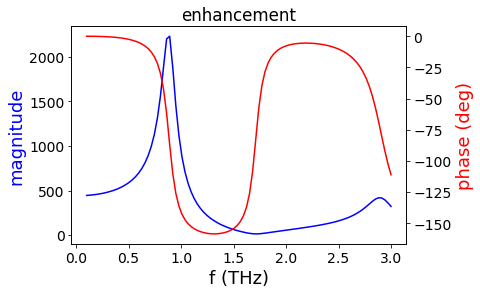

In [10]:
%matplotlib inline
from SpheroidScattering import SpheroidScattering
from scipy import constants
import numpy as np
from matplotlib import pyplot as plt

import matplotlib
font = {'family' : 'normal', 'size'   : 14}
matplotlib.rc('font', **font)

freq = np.zeros(nf)
enhancement = np.zeros(nf, dtype=complex)
for ind in range(nf):
    tipRadius= R
    length = L
    f_i = matfile_params[ind]["f"]
    Nt = matfile_params[ind]["nt"]
    
    freq[ind] = f_i

    spheroid = SpheroidScattering(tipRadius, length)
    spheroid.SetFrequency(f_i)
    spheroid.SetIncidentAngle(np.pi/2.0)
    spheroid.SetFieldAmp(1.0)
    spheroid.SetNumberOfHarmonics(Nt)

    alpha = ReadMatFromFile('../out/' + folder + "/" + "A__" + matfiles_sorted[ind]).reshape(Nt, Nt)
    beta = ReadMatFromFile('../out/' + folder + "/" + "B__" + matfiles_sorted[ind]).reshape(Nt+1, Nt+1)
    gamma = ReadMatFromFile('../out/' + folder + "/" + "G__" + matfiles_sorted[ind])

    enhancement[ind] = spheroid.GetTipEnhancementFromMatrix(alpha, beta, gamma, varifySurfaceField=True)
    

fig, ax1 = plt.subplots()
ax1.plot(freq/constants.tera, np.abs(enhancement), 'b')
ax1.set_xlabel('f (THz)', fontsize=18)
ax1.set_ylabel('magnitude', fontsize=18, color='b')

ax2 = ax1.twinx() 
ax2.plot(freq/constants.tera, np.angle(enhancement)*180.0/np.pi, 'r')
ax2.set_ylabel('phase (deg)', fontsize=18, color='r')
plt.title("enhancement")
plt.savefig("../out/enhancement-frequency.png", bbox_inches="tight", pad_inches=0.5)
plt.show()


/home/nima/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


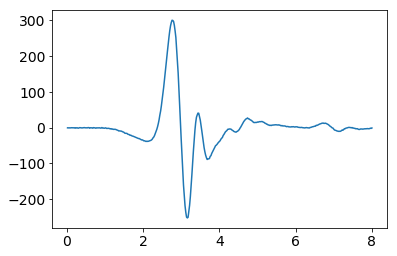

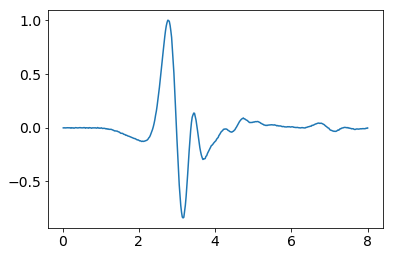

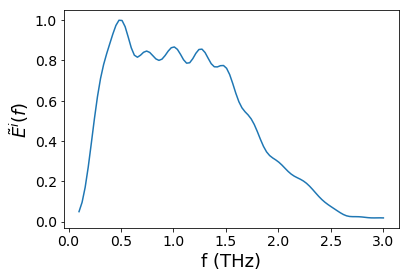

In [8]:
%matplotlib inline

from scipy import constants
import numpy as np
from scipy.interpolate import CubicSpline
    
from numpy import genfromtxt

import matplotlib
from matplotlib import pyplot as plt
font = {'family' : 'normal', 'size'   : 14}

matplotlib.rc('font', **font)

def GetIncSpectrum(f0, f1, n_f):
    my_data = genfromtxt('../out/EO_sampling_data.csv')

    n_cols = my_data.shape[1]
    #print("n_cols: ", n_cols)

    for i in range(1, 2):
        plt.plot(my_data[:,0], my_data[:,i])
    plt.show()

    t_samples_ps = my_data[:,0]
    E_t_samples = my_data[:, 1]
    E_t_samples /= np.max(np.abs(E_t_samples))

    padPoints = False
    if padPoints:
        dt_ps = t_samples_ps[1] - t_samples_ps[0]
        t_extra = np.array([t_samples_ps[-1] + i*dt_ps for i in range(1, 1000)])
        E_extra = np.zeros(len(t_extra))

        t_samples_ps = np.concatenate((t_samples_ps, t_extra))
        E_t_samples = np.concatenate((E_t_samples, E_extra))

    n_t, t_ps, E_t = [None]*3
    intpolate = False
    if intpolate:
        n_t = 2000
        cs = CubicSpline(t_samples_ps, E_t_samples)
        t_ps = np.linspace(t_samples_ps[0], t_samples_ps[-1], n_t)
        E_t = cs(t_ps)
    else:
        t_ps = t_samples_ps
        E_t = E_t_samples
        n_t = len(t_ps)

    plt.plot(t_ps, E_t)
    plt.show()

    t = t_ps * 1.0e-12 
    f = np.linspace(f0, f1, n_f)
    E_f = np.zeros(n_f, dtype=complex)    
    for i in range(n_f):
        w_i = 2.0*np.pi*f[i]
        for j in range(n_t):
            E_f[i] += E_t[j]*np.exp(-1j*w_i*t[j]) 
    E_f *= (t[1] - t[0])
    
    return t, E_t, f, E_f

t, E_t, f, E_f = GetIncSpectrum(0.1*constants.tera, 3.0*constants.tera, 100)

plt.plot(f/constants.tera, np.abs(E_f)/np.max(np.abs(E_f)))
plt.xlabel("f (THz)", fontsize=18)
plt.ylabel(r"$\tilde{E}^i(f)$", fontsize=18)
plt.savefig("../out/incident-spectrum.png", bbox_inches="tight", pad_inches=0.5)
plt.show()

100


/home/nima/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


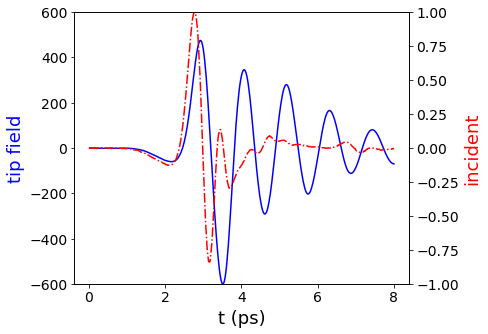

In [26]:
print(len(f))

n_t = len(t)
E_tip = np.zeros(n_t)

n_f = len(f)
for i in range(n_t):
    for j in range(n_f):
        w_j = 2.0*np.pi*f[j]
        E_tip[i] += 2.0*np.real(enhancement[j]*E_f[j] * np.exp(1j*w_j*t[i]))
E_tip *= (f[1] - f[0])

fig, ax1 = plt.subplots()
ax1.plot(t/constants.pico, E_tip, 'b')
ax1.set_xlabel('t (ps)', fontsize=18)
ax1.set_ylabel('tip field', fontsize=18, color='b')
ax1.set_ylim(-600, 600)

ax2 = ax1.twinx() 
ax2.plot(t/constants.pico, E_t, 'r-.')
ax2.set_ylabel('incident', fontsize=18, color='r')
ax2.set_ylim(-1, 1)
plt.savefig("../out/enhancement-time.png", bbox_inches="tight", pad_inches=0.5)
plt.show()

In [10]:
%matplotlib tk

from SpheroidScattering import SpheroidScattering
from scipy import constants
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation

import matplotlib
font = {'family' : 'normal', 'size'   : 14}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = [6, 5]

E_freq = np.zeros(nf)
E_f_mesh_list = [None]*nf
extent = None
for ind in range(nf):
    f_i = eksifile_params[ind]["f"]
    nx = eksifile_params[ind]["nx"]
    nz = eksifile_params[ind]["nz"]
    Dx = eksifile_params[ind]["Dx"]
    Dz = eksifile_params[ind]["Dz"]
    
    extent = np.array([-Dx/2, Dx/2, -Dz/2, Dz/2])/constants.nano
    
    E_freq[ind] = f_i

    E_f_mesh_list[ind] = ReadMatFromFile('../out/' + folder + "/" + "E_ksi__" + eksifiles_sorted[ind]).reshape(nx, nz)

n_t = len(t)
E_t_mesh_list = [None]*n_t

n_f = len(f)
for i in range(n_t):
    E_t_mesh_list[i] = np.zeros(E_f_mesh_list[0].shape, dtype=complex)
    for j in range(n_f):
        w_j = 2.0*np.pi*f[j]
        E_t_mesh_list[i] += 2.0*np.real(E_f_mesh_list[j] *E_f[j]* np.exp(1j*w_j*t[i]))
    E_t_mesh_list[i] *= (f[1] - f[0])

dt_ps = (t[1] - t[0])/constants.pico
def animate_E(n):
    E_n = E_t_mesh_list[n]
    plt.clf()
    fig = plt.imshow(np.real(E_n.T), cmap="rainbow", origin='lower', aspect='auto', extent=extent)
    plt.colorbar()
    plt.xlabel(r'$x (nm)$')
    plt.ylabel(r'$z (nm)$')
    plt.title(r't = {:.3f} ps'.format(n*dt_ps))
    plt.pause(0.05)

    return fig

fig = plt.figure(figsize=(7, 6))
anim = animation.FuncAnimation(fig, animate_E, frames=n_t, interval=1, repeat=False)
anim.save('../out/Efield-anim.mp4', writer="ffmpeg", fps=15, dpi=200)
plt.show()



/home/nima/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [1]:
%pylab tk

Populating the interactive namespace from numpy and matplotlib
